<h3 style="color:rgb(84, 50, 223);">Data Understanding </h3>

<u><h4 style="color:rgb(14, 218, 129);" >Context </h4> </u>  
An international e-commerce company based in Kenya  wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products  

The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
Cost of the product: Cost of the Product in US Dollars.
Prior purchases: The Number of Prior Purchase.
Product importance: The company has categorized the product in the various parameter such as low, medium, high.
Gender: Male and Female.
Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

<u> Objective of the Analysis </u>

What was Customer Rating?   
And was the product delivered on time?
Is Customer query is being answered?  
If Product importance is high. having higest rating or being delivered on time?

#### Import Libraries 

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## 1.EDA

In [179]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [180]:
#Checking our data shape
df.shape

(10999, 12)

In [181]:
#Data types
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [183]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [184]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Data Visualization

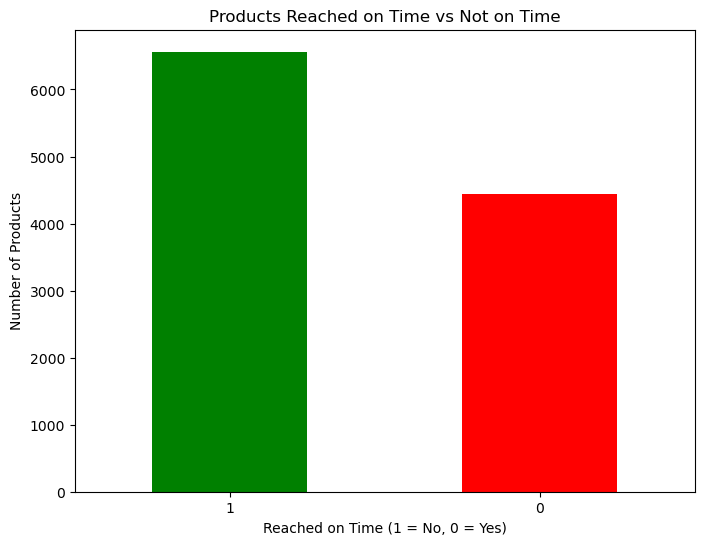

In [185]:
on_time_counts = df['Reached.on.Time_Y.N'].value_counts()

plt.figure(figsize=(8, 6))
on_time_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Products Reached on Time vs Not on Time")
plt.xlabel("Reached on Time (1 = No, 0 = Yes)")
plt.ylabel("Number of Products")
plt.xticks(rotation=0)
plt.show()

# From our plot we can see that most products didnt reach on time 

In [ ]:
#A pairplot 
sns.pairplot(df, hue="Reached.on.Time_Y.N", diag_kind="kde", palette="husl")

plt.show()

#Discount Offered has highest classification power

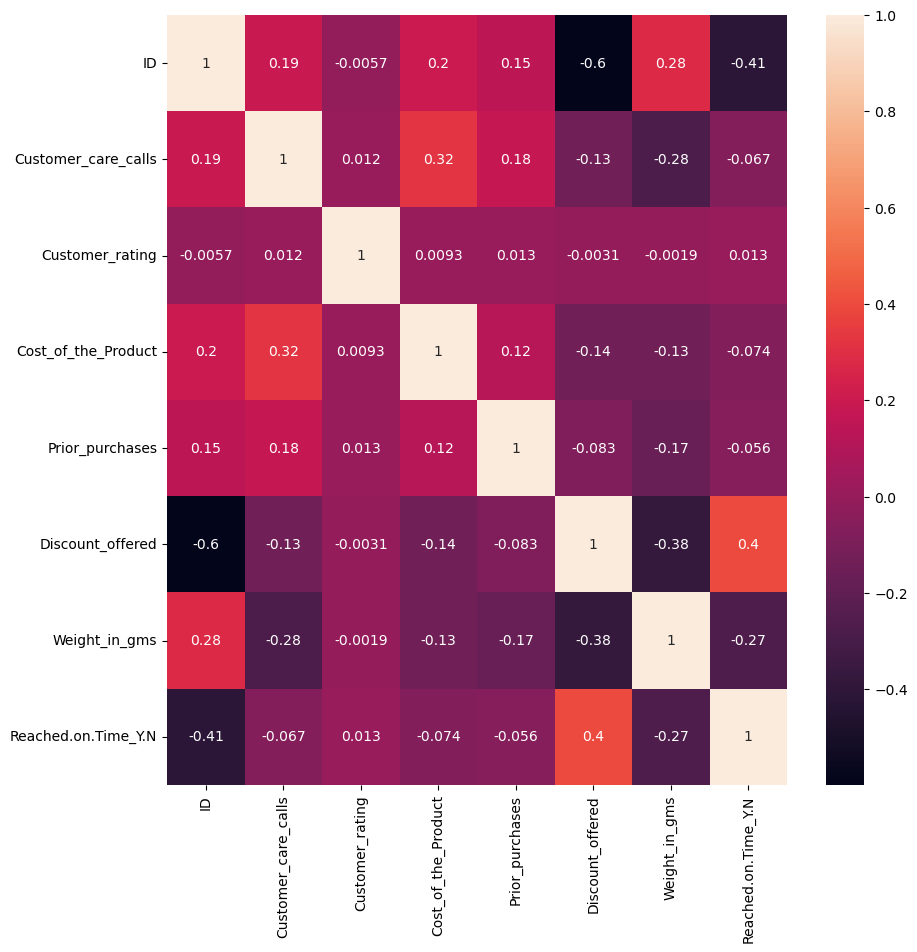

In [ ]:
#Correlation heatmap
numeric_df =  df.select_dtypes(include ='number')
fig = plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(),annot = True)
plt.show()

### One Hot Encoding  
 -  for our Gender, Warehouse and mode of transport data since they are categorical data

In [52]:
categorical = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']
encoded = OneHotEncoder(sparse_output=False)
feature_array = encoded.fit_transform(df[categorical])
feature_labels = encoded.get_feature_names_out(categorical)

#A dataframme of the one hot encoded features
features = pd.DataFrame(feature_array,columns=feature_labels)
features.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [55]:
#Concat Data and Features and dropping all original categorical columns 
df =  pd.concat([df,features], axis=1)
df.drop(categorical,axis=1,inplace=True)

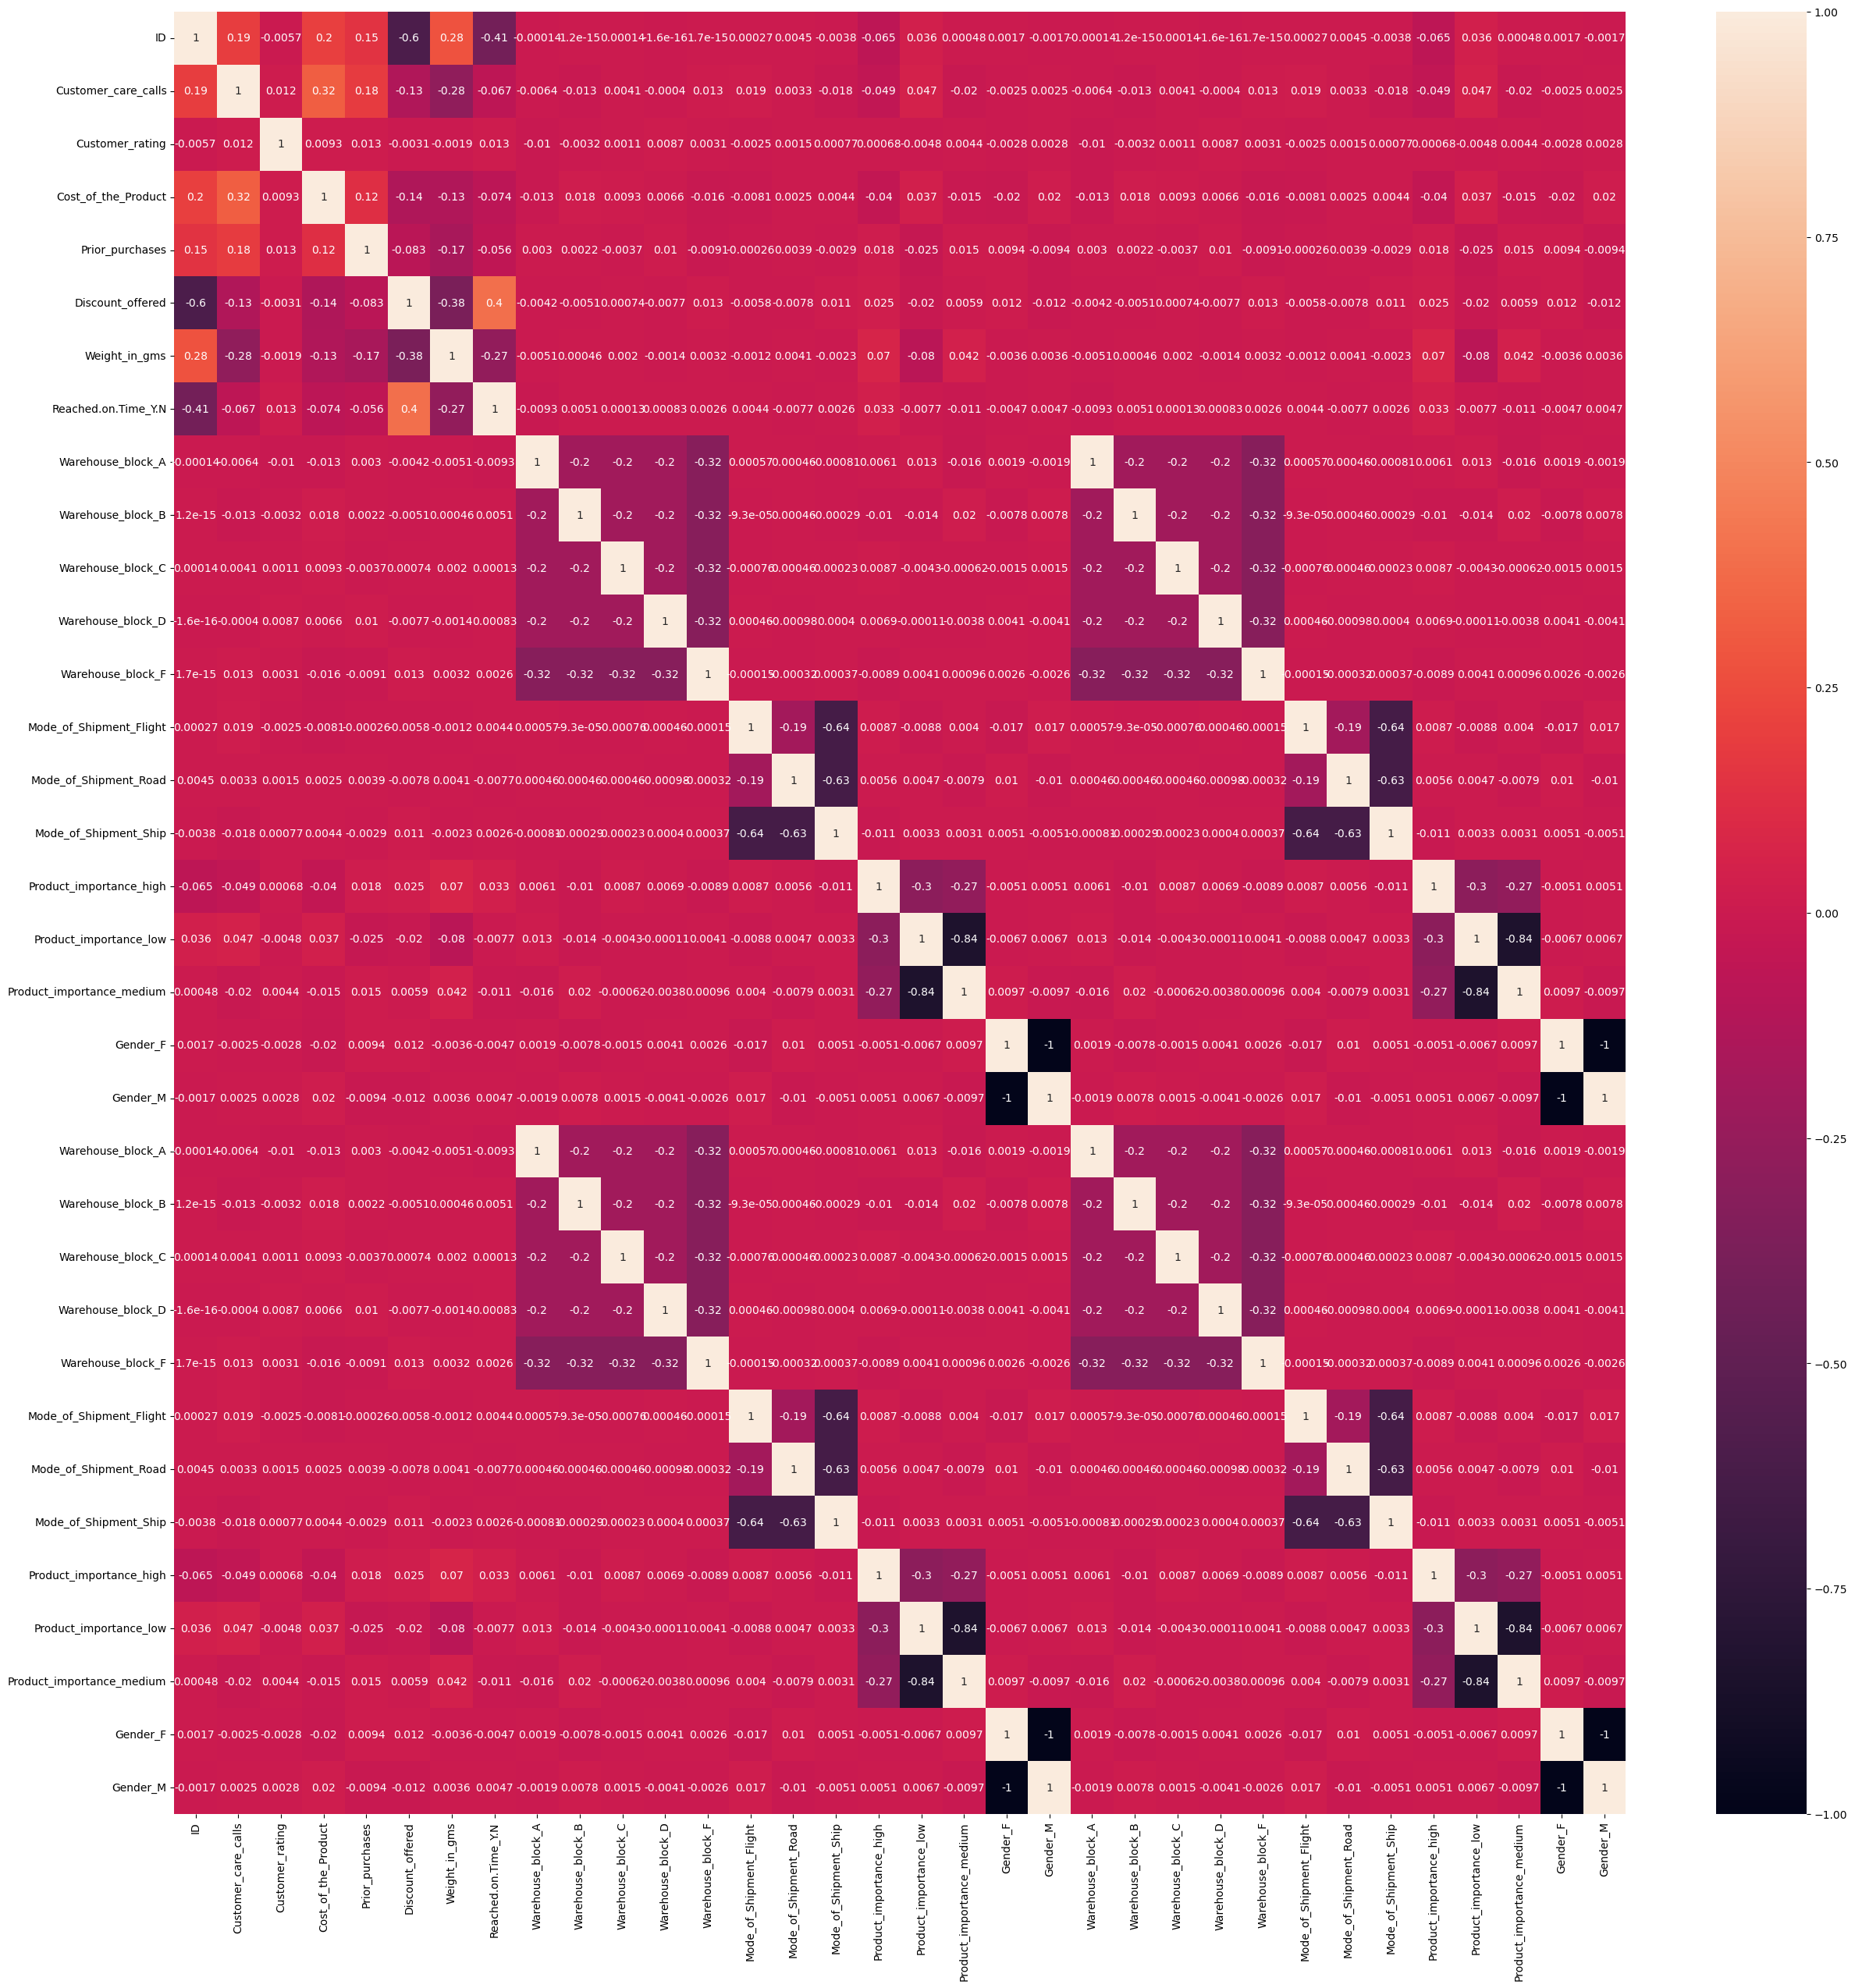

In [ ]:
#Heatmap
fig = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [135]:
corre = df.corr()["Reached.on.Time_Y.N"]
sorted_corre= corre.abs().sort_values(ascending=False)
# pd.set_option('display.max_rows', None)
print(sorted_corre)

Reached.on.Time_Y.N          1.000000
ID                           0.411822
Discount_offered             0.397108
Weight_in_gms                0.268793
Cost_of_the_Product          0.073587
Customer_care_calls          0.067126
Prior_purchases              0.055515
Product_importance_high      0.033242
Product_importance_high      0.033242
Customer_rating              0.013119
Product_importance_medium    0.011099
Product_importance_medium    0.011099
Warehouse_block_A            0.009317
Warehouse_block_A            0.009317
Mode_of_Shipment_Road        0.007671
Mode_of_Shipment_Road        0.007671
Product_importance_low       0.007667
Product_importance_low       0.007667
Warehouse_block_B            0.005106
Warehouse_block_B            0.005106
Gender_F                     0.004689
Gender_F                     0.004689
Gender_M                     0.004689
Gender_M                     0.004689
Mode_of_Shipment_Flight      0.004371
Mode_of_Shipment_Flight      0.004371
Mode_of_Ship

#### Modelling

In [99]:
#Splitting dataset 
X = df.drop("Reached.on.Time_Y.N", axis = 1)
y = df["Reached.on.Time_Y.N"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

##### Logistic Regression 

with sk learn

In [ ]:
testing = df.drop("Reached.on.Time_Y.N", axis=1).select_dtypes('number')

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)
result = pd.DataFrame(clf.predict(testing), columns = ['pred'])

print("Train Accuracy:", accuracy_score(y_train, y_train_preds))
print("Test Accuracy:", accuracy_score(y_test, y_test_preds))
print("Classification Report:\n", classification_report(y_test, y_test_preds))


c:\Users\mulwa\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.6565518808955563
Test Accuracy: 0.6559090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.62      0.59       895
           1       0.72      0.68      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.66      0.66      2200



the correct prediction made by the model on test set = 65.2%.Need to increase it 
Recall_score shows how our model identifies positive intances of the target class =68% need to increase it 

#### Decision trees

In [146]:
clf = DecisionTreeClassifier(max_depth=None)
clf.fit(X_train,y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf .predict(X_test)
result = pd.DataFrame(clf.predict(testing), columns = ['pred'])

decision = round(recall_score(y_test, y_test_preds))

print("Train Accuracy:", accuracy_score(y_train, y_train_preds))
print("Test Accuracy:", accuracy_score(y_test, y_test_preds))
print("Classification Report:\n", classification_report(y_test, y_test_preds))

Train Accuracy: 1.0
Test Accuracy: 0.649090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.56      0.56       895
           1       0.70      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



Accuracy of 100% shows overfitting   
Test Accuracy =65% lower than 100 % showingg overfitting   
precison57% of 0 & 70% of 1 were predicted correctly   
recall;56% of actual 0 & 71% of actual 1 were predicted   correctly  
  
<u>Next Steps </u>
 - Handling Class imbalance using SMOTE to perform over-sampling
 -  using lasso and ridge to address overfitting 

random forest classifier  
improve prediction and reduce overfitting 

In [154]:
#droppig some columns to address
X = ['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product', 
  'Customer_care_calls', 'Prior_purchases','Gender_M','Warehouse_block_A']
X_selected =df[X]
print(X_selected.head())

   Discount_offered  Weight_in_gms  Cost_of_the_Product  Customer_care_calls  \
0                44           1233                  177                    4   
1                59           3088                  216                    4   
2                48           3374                  183                    2   
3                10           1177                  176                    3   
4                46           2484                  184                    2   

   Prior_purchases  Gender_M  Gender_M  Warehouse_block_A  Warehouse_block_A  
0                3       0.0       0.0                0.0                0.0  
1                2       1.0       1.0                0.0                0.0  
2                4       1.0       1.0                1.0                1.0  
3                4       1.0       1.0                0.0                0.0  
4                3       0.0       0.0                0.0                0.0  


Linear regression of our X_Selected 

In [176]:
#Train test split using the new selected_x Set
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)


print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))


Train Accuracy: 0.6352994658483918
Test Accuracy: 0.6372727272727273


c:\Users\mulwa\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Using SMOTE TO handle class imbalance
smote = SMOTE(random_state =42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Random forest
clf = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled )
y_pred = clf .predict(X_test)
# result = pd.DataFrame(clf.predict(testing), columns = ['pred'])

# decision = round(recall_score(y_test, y_test_preds))

print("Train Accuracy:", clf.score(X_train_resampled, y_train_resampled))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.6740909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.70      0.64       895
           1       0.76      0.66      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.68      2200



In [ ]:
# 4. Cross-validation (Optional for robustness)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Train Accuracy: 1.0
Test Accuracy: 0.6740909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.70      0.64       895
           1       0.76      0.66      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.67      2200
weighted avg       0.69      0.67      0.68      2200



Scaling 

In [119]:
#Standardize my data 
scaler =StandardScaler()
x_scaled = scaler.fit_transform(numeric_df)

#PCA
pca =PCA()
X_pca =  pca.fit_transform(x_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance =pca.explained_variance_ratio_.cumsum()

print(cumulative_variance)
print(explained_variance_ratio)

[0.28090423 0.48417778 0.60921072 0.7217477  0.80921396 0.89056839
 0.95147243 1.        ]
[0.28090423 0.20327355 0.12503294 0.11253698 0.08746625 0.08135443
 0.06090404 0.04852757]


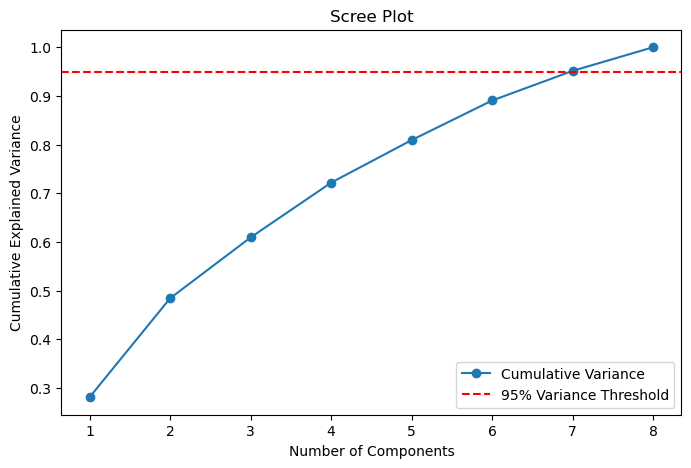

In [ ]:
#Plotting my Cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [ ]:
#To reduce dimensionality n_component =7 i.e noice and redundancy 
PCA
pca =PCA(n_components=7)
X_pca =  pca.fit_transform(x_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance =pca.explained_variance_ratio_.cumsum()

print(explained_variance_ratio)
print(cumulative_variance)


[0.28090423 0.20327355 0.12503294 0.11253698 0.08746625 0.08135443
 0.06090404]
[0.28090423 0.48417778 0.60921072 0.7217477  0.80921396 0.89056839
 0.95147243]


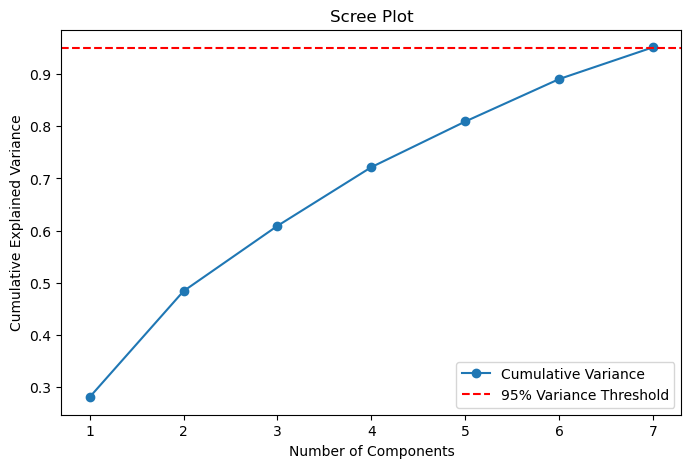

In [124]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

Dropping some column to improve model simplicity